# **Experiment #2**: Preprocessing


In [1]:
import mne

# Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
# Scikit-learn and Pyriemann ML functionalities
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedShuffleSplit
from pyriemann.estimation import Covariances, ERPCovariances, XdawnCovariances
from pyriemann.spatialfilters import CSP
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM

from utilities import read_xdf, epoching

### **Load Data**

In [5]:
filenames = {'Pipo_1_5_test1.xdf', 'Pipo_1_5_test2.xdf', 'Pipo_1_5_test3.xdf'}

X, F, t, y = [],[],[],[]; tmax=5
for filename in filenames:

    raw = read_xdf(filename, show_plot=False, show_psd=False, bandpass=(4.0, 12.0))

    epochs = epoching(raw, show_psd=False,
        show_eeg=False,    # set True if wanna see preview of all epoch
        tmax=tmax)         # tmax=5 means set epoch duration 5 second

    # Pick only event 2: Left stimuli, 5: Right stimuli
    epochs = epochs['2','5']

    X.append((  epochs.get_data() * 1e6)[:,:,:int( tmax*250 )]) # 250 is record sampling rate
    t.append((  epochs.times)[:int( tmax*250 )]) # 250 is record sampling rate          
    F.append(   epochs.compute_psd(
        method='welch', 
        fmax=30,
        n_per_seg=len(epochs.times)
        
        # raise ValueError(('If n_per_seg is None n_fft is not allowed to be > ''n_times. 
        # If you want zero-padding, you have to set ''n_per_seg to relevant length. Got n_fft of %d while'' signal length is %d.') % (n_fft, n))

        # n_fft : int
        #     The length of FFT used, must be ``>= n_per_seg`` (default: 256).
        #     The segments will be zero-padded if ``n_fft > n_per_seg``.
        # n_per_seg : int | None
        #     Length of each Welch segment. The smaller it is with respect to the
        #     signal length the smoother are the PSDs. Defaults to None, which sets
        #     n_per_seg equal to n_fft.
        ).get_data())
    y.append(   epochs.events[:, -1])

# Concatenate all data
X = np.concatenate(X)
F = np.concatenate(F)
t = np.concatenate(t)
y = np.concatenate(y)

Creating RawArray with float64 data, n_channels=8, n_times=52020
    Range : 0 ... 52019 =      0.000 ...   208.006 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=49650
    Range : 0 ... 49649 =      0.000 ...   198.521 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1251 original time points ...
1 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

Creating RawArray with float64 data, n_channels=8, n_times=50520
    Range : 0 ... 50519 =      0.000 ...   201.994 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.651 sec)

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6']
Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 1252 original time points ...
0 bad epochs dropped
Effective window size : 1.024 (s

c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:44: RuntimeWarning: The unit for channel(s) obci_eeg1_0 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_0': 'eeg'})   # FP1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:45: RuntimeWarning: The unit for channel(s) obci_eeg1_1 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_1': 'eeg'})   # O1
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:46: RuntimeWarning: The unit for channel(s) obci_eeg1_2 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_2': 'eeg'})   # Oz
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:47: RuntimeWarning: The unit for channel(s) obci_eeg1_3 has changed from NA to V.
  raw.set_channel_types({'obci_eeg1_3': 'eeg'})   # O2
c:\Users\seami\OneDrive\Documents\GitHub\BCI-MNE-project\Offline\utilities.py:48: RuntimeWarning: The unit for channel(s) obci_eeg1_4 has c

In [6]:
X.shape, F.shape, t.shape, y.shape

((48, 5, 1250), (48, 5, 31), (3750,), (48,))

## **Cross-validation**

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from tqdm.auto import tqdm

In [8]:
# Build model
import keras
from keras.models import Model
from keras.layers import  Input, Dense,Dropout, Conv1D, MaxPooling1D, Flatten,BatchNormalization
from keras.optimizers import Adam
from keras import backend as K  

class CNNModel(Model):
    def __init__(self, inputsize=1250):
        super().__init__()

        # Input layer shape
        self.inputshape = (5, inputsize)

        # Parameters
        self.bath_size = 4
        self.train_epochs = 5
        self.upper_threshold = 0.8
        self.lower_threshold = 0.2

        # Define layers
        self.conv1_layer1 = Conv1D(filters=128, kernel_size=3, activation='relu')
        self.bath_norm_layer1 =BatchNormalization(name='batch_norm_layer1')
        self.maxpool_layer1 = MaxPooling1D(2, name='maxpool_layer1')
        self.dropout_layer1 = Dropout(0.2, name='dropout_layer1')
        self.dense_layer1 = Dense(64, activation='relu', name='dense_layer1')
        self.fatten_layer1 = Flatten(name='fatten_layer1')
        self.dropout_layer2 = Dropout(0.2, name='dropout_layer2')
        self.dense_layer2 = Dense(32, activation='relu', name='dense_layer2')
        self.output_layer = Dense(1, activation='sigmoid', name='output_layer')

        # Get model
        self.model = self.get_model()

    def get_model(self):

        # Define input
        input_layer = Input(shape=self.inputshape, name='input_layer')

        # Model layers
        x = self.conv1_layer1(input_layer)
        x = self.bath_norm_layer1(x)
        x = self.maxpool_layer1(x)
        x = self.dropout_layer1(x)
        x = self.dense_layer1(x)
        x = self.fatten_layer1(x)
        x = self.dropout_layer2(x)
        x = self.dense_layer2(x)
        output_layer = self.output_layer(x)

        # Model
        model = Model(inputs=input_layer, outputs=output_layer, name='CNNModel')
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

💡 [EEG Notebook](https://neurotechx.github.io/eeg-notebooks/auto_examples/visual_ssvep/02r__ssvep_decoding.html)

In [ ]:
RESULTS = list()

for INPUT in [X, F]:

    # Next, we will use 5 different machine learning pipelines to classify the SSVEP based on the data we collected. The

    # - CSP + RegLDA : Common Spatial Patterns + Regularized Linear Discriminat Analysis. This is a very common EEG analysis pipeline.
    # - Cov + TS : Covariance + Tangent space mapping. One of the most reliable Riemannian geometry-based pipelines.
    # - Cov + MDM: Covariance + MDM. A very simple, yet effective (for low channel count), Riemannian geometry classifier.
    # - CSP + Cov + TS: Common Spatial Patterns + Covariance + Tangent spacem mapping. Riemannian pipeline with the standard CSP procedure beforehand
    # - CNN: 

    # Evaluation is done through cross-validation, with area-under-the-curve (AUC) as metric (AUC is probably the best metric for binary and unbalanced classification problem)

    # Note: because we're doing machine learning here, the following cell may take a while to complete

    clfs = OrderedDict()
    clfs['CSP + RegLDA'] = make_pipeline(Covariances(), CSP(4), LDA(shrinkage='auto', solver='eigen'))
    clfs['Cov + TS'] = make_pipeline(Covariances(), TangentSpace(), LogisticRegression())
    clfs['Cov + MDM'] = make_pipeline(Covariances(), MDM())
    clfs['CSP + Cov + TS'] = make_pipeline(Covariances(), CSP(4, log=False), TangentSpace(), LogisticRegression())

    from scikeras.wrappers import KerasClassifier

    CNN = CNNModel( inputsize=INPUT.shape[-1] )
    clfs['CNN'] = KerasClassifier(model=CNN.get_model(), epochs=10, batch_size=8, verbose=0)

    # define cross validation
    cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25,
                                            random_state=42)
    scoring = {'acc': 'accuracy',
        'auc': 'roc_auc'}

    # run cross validation for each pipeline
    acc,auc = [],[]
    methods = []
    for m in tqdm(clfs):
        # print(m)
        res = cross_validate(clfs[m], INPUT, y, scoring=scoring, cv=cv, n_jobs=-1)
        '''res = {'fit_time': array([3.94812942, 3.98712373, 3.819134  , 3.88912916]),
                'score_time': array([0.53296137, 0.5869596 , 0.53796363, 0.6069591 ]),
                'test_acc': array([1.        , 0.95833333, 1.        , 1.        ]),
                'test_auc': array([1., 1., 1., 1.])}'''
        acc.extend(res['test_acc'])
        auc.extend(res['test_auc'])
        methods.extend([m]*len(res['score_time']))

    results = pd.DataFrame(data=auc, columns=['AUC'])
    results['Accuracy'] = acc
    results['Method'] = methods

    RESULTS.append(results)

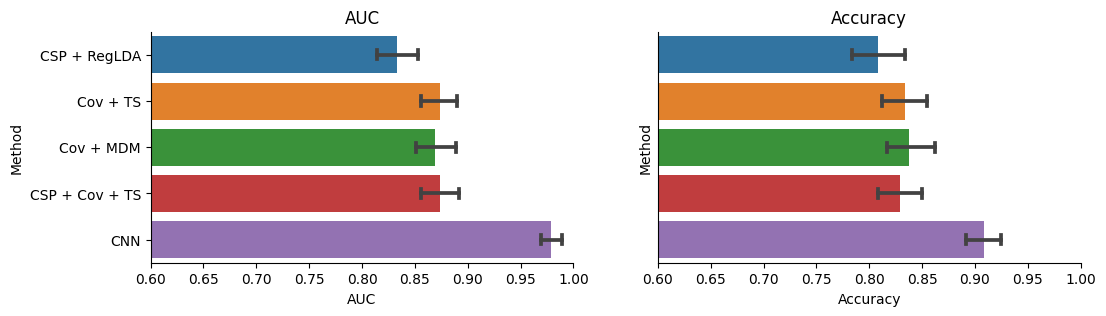

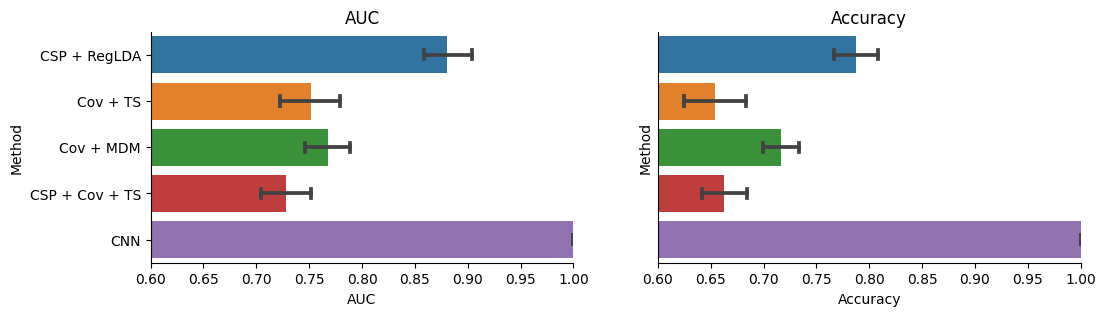

In [21]:
for results in RESULTS:
    fig, ax = plt.subplots(ncols=2, figsize=[12,3])
    sns.barplot(data=results, x='AUC', y='Method', capsize=.2, ax=ax[0],
            errorbar=('ci', 68),
            # default ci=95 is ~1.96 standard errors, and ci=68 is ~1 standard error
        )
    ax[0].set_xlim(0.6, 1); ax[0].set_title('AUC')
    sns.despine()

    # fig, ax = plt.subplot(2, figsize=[8,4])
    sns.barplot(data=results, x='Accuracy', y='Method', capsize=.2, ax=ax[1],
            errorbar=('ci', 68),
            # default ci=95 is ~1.96 standard errors, and ci=68 is ~1 standard error
        )
    ax[1].set_xlim(0.6, 1); ax[1].set_title('Accuracy'); ax[1].set_yticks([])
    sns.despine()
    plt.show()